X: [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


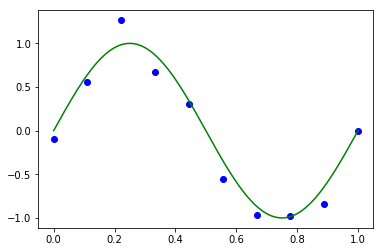

In [26]:
%matplotlib inline
import numpy as np
import sys
import matplotlib.pyplot as plt

#Xの値を0から1の間に指定し、等間隔な10この点をXに代入
X = np.linspace(0, 1, 10)
#Xの値の確認
print('X:', X)
#ガウス分布に従うノイズを生成　引数：(平均0、標準偏差、出力件数)
noise = np.random.normal(0, 0.2, X.size)
#サイン関数にノイズを加えたYを生成
Y = np.sin(2 * np.pi * X) + noise

#元々のsin曲線と対比するための描画の準備
cont_x = np.linspace(0, 1, 500)
original = np.sin(2 * np.pi * cont_x)
#ノイズありの10点を青色でプロット
plt.plot(X, Y, 'bo')
#元々のsin関数を緑の線でプロット
plt.plot(cont_x, original, '-g')
plt.show()

In [27]:
###それぞれの関数の定義

#誤差関数(最小二乗法)をそれぞれの重み w[i](i = 1, 2,…,10)で微分し、
#その微分が0(誤差が最小)になるw[i]をそれぞれ求める。
def solve_for_W(X, M, LAMBDA):
    #X_sumsは最小二乗法を行った後に、パラメータWの係数を(M+1, M+1)で表した行列
    X_sums = []
    for i in range(M + 1):
        for j in range(M + 1):
            #対角線上の項ならλを足す
            if i == j:
                X_sums.append(np.sum(X ** (i + j) + LAMBDA))
            else:
                X_sums.append(np.sum(X ** (i + j)))
    X_sums = np.reshape(X_sums, (M + 1, M + 1))
    #XY_sumsは最小二乗法を行った後に、パラメータWの無い項を(M+1, 1)で表した行列
    XY_sum = []
    for i in range(M + 1):
        XY_sum.append(np.sum(np.dot(X ** i, Y)))
    XY_sum = np.reshape(XY_sum, (M + 1, 1))

    # パラメータWは線形連立方程式の解
    W = np.linalg.solve(X_sums, XY_sum)
    #Wの値を確認
    print('Wの値(M={},λ={}のとき)：\n{}'.format(M, LAMBDA, W))
    return W

#学習データの行列を作成(多項式のMが2のとき)
def to_matrix(x, M):
    terms_list = []
    for i in range(M + 1):
        if i == 0:
            terms_list.append(np.ones(x.shape[0]))
        else:
            term_i = x ** i
            terms_list.append(term_i)
    return np.vstack(terms_list).T

#多項式関数の定義
def f(x, w):
    return np.dot(x, w)

Wの値(M=9,λ=0のとき)：
[[-9.27997937e-02]
 [-1.15681339e+02]
 [ 2.68271313e+03]
 [-2.28038493e+04]
 [ 1.00935291e+05]
 [-2.60794342e+05]
 [ 4.07391006e+05]
 [-3.78722596e+05]
 [ 1.92784328e+05]
 [-4.13567790e+04]]


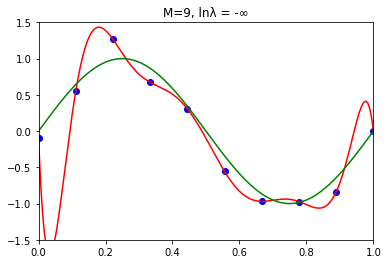

In [28]:
#M = 9, lnλ = -∞(λ ≈ 0)のとき
M = 9
LAMBDA = 0
#重みパラメータWを求める
W = solve_for_W(X, M, LAMBDA)

#ノイズありの10点を青色でプロット
plt.plot(X, Y, 'bo')
##推定を行う関数のプロット
#元々のsin曲線と対比するための描画の準備
cont_x = np.linspace(0, 1, 500)
Mat_X = to_matrix(cont_x, M)
plt.plot(cont_x, f(Mat_X, W), '-r')
#元々のsin関数を緑の線でプロット
plt.plot(cont_x, original, '-g')
plt.xlim(0.0, 1.0)
plt.ylim(-1.5, 1.5)
plt.title('M=9, lnλ = -∞')
plt.show()

Wの値(M=9,λ=1.52299797e-08のとき)：
[[-1.14420611e-01]
 [ 6.54413200e+00]
 [ 1.48189263e+01]
 [-1.17333433e+02]
 [ 1.07538817e+02]
 [ 5.99657251e+01]
 [-3.09312260e+01]
 [-6.14853938e+01]
 [-3.01585009e+01]
 [ 5.11520550e+01]]


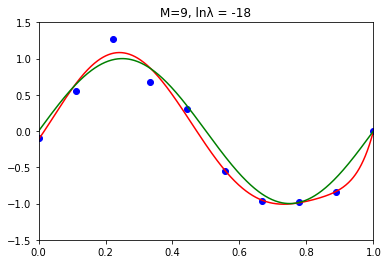

In [29]:
#M = 9, lnλ = -18(λ ≈ 1.52299797e-8)のとき
M = 9
LAMBDA = 1.52299797e-8
#重みパラメータWを求める
W = solve_for_W(X, M, LAMBDA)

#ノイズありの10点を青色でプロット
plt.plot(X, Y, 'bo')
##推定を行う関数のプロット
#元々のsin曲線と対比するための描画の準備
cont_x = np.linspace(0, 1, 500)
Mat_X = to_matrix(cont_x, M)
plt.plot(cont_x, f(Mat_X, W), '-r')
#元々のsin関数を緑の線でプロット
plt.plot(cont_x, original, '-g')
plt.xlim(0.0, 1.0)
plt.ylim(-1.5, 1.5)
plt.title('M=9, lnλ = -18')
plt.show()

Wの値(M=9,λ=1のとき)：
[[ 0.03030043]
 [-0.09314947]
 [-0.09313044]
 [-0.07200074]
 [-0.05127601]
 [-0.03445024]
 [-0.02135208]
 [-0.01120502]
 [-0.00328679]
 [ 0.00296231]]


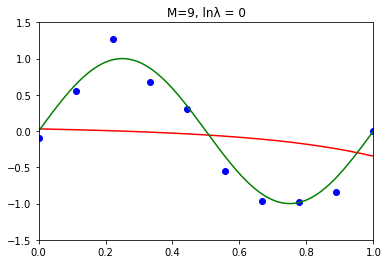

In [30]:
#M = 9, lnλ = 0(λ = 1)のとき
M = 9
LAMBDA = 1
#重みパラメータWを求める
W = solve_for_W(X, M, LAMBDA)

#ノイズありの10点を青色でプロット
plt.plot(X, Y, 'bo')
##推定を行う関数のプロット
#元々のsin曲線と対比するための描画の準備
cont_x = np.linspace(0, 1, 500)
Mat_X = to_matrix(cont_x, M)
plt.plot(cont_x, f(Mat_X, W), '-r')
#元々のsin関数を緑の線でプロット
plt.plot(cont_x, original, '-g')
plt.xlim(0.0, 1.0)
plt.ylim(-1.5, 1.5)
plt.title('M=9, lnλ = 0')
plt.show()

<h1>Conclusions</h1>
When you apply a regularization term to an error function, it can lower abusolute values for each Wi for i = 0,1,2,…,M. Depending on the value of λ, it can sometimes works for overfitted models to predict things accurately.

<h1>結論</h1>
正則化項を誤差関数に加えればそれぞれのWi(for i = 0,1,2,…,M)の絶対値を小さくすることができる。そしてλの値によっては、時に過学習の状態の推論モデルに対して、過学習の状態を和らげることができる。